In [1]:
# Load all dictionaries
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from heatmaps_functions import *
from linares_plot import *

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [2]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_close_delay_chg_isol.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_delay_chg_isol.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_close_delay_chg_isol.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_delay_chg_isol.xlsx']

In [3]:
paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_close_delay_chg_isol.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_delay_chg_isol.xlsx']

paths_distractor_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_close_delay_chg_isol.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_delay_chg_isol.xlsx']

In [4]:
df_target=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[4]
    
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)

In [5]:
df_distractor=[]
df_distractor_shuff=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)

####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[4]
    
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)

In [6]:
df = pd.concat([df_target, df_distractor])
df['label']= df['item'] + ' ' + df['distance'] 
df['label'] = df['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df.head()

,times,decoding,region,subject,condition,label,item,trained,distance
0,0.000,-18.829650,visual,s001,2_7,tc,target,delay,close
1,2.335,-13.307546,visual,s001,2_7,tc,target,delay,close
2,4.670,-7.347672,visual,s001,2_7,tc,target,delay,close
3,7.005,10.606644,visual,s001,2_7,tc,target,delay,close
4,9.340,32.656109,visual,s001,2_7,tc,target,delay,close


In [7]:
df_shuff = pd.concat([df_target_shuff, df_distractor_shuff])
df_shuff['label']= df_shuff['item'] + ' ' + df_shuff['distance'] 
df_shuff['label'] = df_shuff['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df_shuff.head()

,times,decoding,region,subject,condition,label,item,trained,distance
0,0.000,-1.065254,visual,d001,1_7,tc,target,delay,close
1,2.335,-1.197581,visual,d001,1_7,tc,target,delay,close
2,4.670,0.118817,visual,d001,1_7,tc,target,delay,close
3,7.005,1.668138,visual,d001,1_7,tc,target,delay,close
4,9.340,1.868526,visual,d001,1_7,tc,target,delay,close


In [10]:
df_delay=[]
for cond in ['1_7', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for dist in ['close','far']: 
                for item in ['target', 'dist']:
                    ####
                    if cond =='1_7':
                        if item=='target':
                            dfn = df.loc[(df['region']==reg) & 
                                     ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                     ( df['condition']==cond) & (df['subject']==subj) &  
                                     ( df['distance']==dist) & (df['trained']=='delay') & 
                                     ( df['item']==item)]
                            #
                            dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                     ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                     ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                     ( df_shuff['distance']==dist) & (df_shuff['trained']=='delay') & 
                                     ( df_shuff['item']==item)]

                            ###
                            decoding = dfn.decoding.mean() #option1
                            #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                            decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                            ###
                            df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                          item, 'delay', dist] )   
                        ####
                        elif item=='dist':
                            dfn = df.loc[(df['region']==reg) & 
                                     ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                     ( df['condition']==cond) & (df['subject']==subj) &  
                                     ( df['distance']==dist) & (df['trained']=='delay') & 
                                     ( df['item']==item)]
                            #
                            dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                     ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                     ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                     ( df_shuff['distance']==dist) & (df_shuff['trained']=='delay') & 
                                     ( df_shuff['item']==item)]

                            ###
                            decoding = dfn.decoding.mean() #option1
                            #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                            decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                            ###
                            df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                          item, 'delay', dist] )        
                            #
                        #
                    #
                    elif cond =='2_7': ##just the TRs they are "alone"; in 1_ there is coexistance!
                        if item=='target':
                            dfn = df.loc[(df['region']==reg) & 
                                     ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                     ( df['condition']==cond) & (df['subject']==subj) &  
                                     ( df['distance']==dist) & (df['trained']=='delay') & 
                                     ( df['item']==item)]
                            #
                            dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                     ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                     ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                     ( df_shuff['distance']==dist) & (df_shuff['trained']=='delay') & 
                                     ( df_shuff['item']==item)]

                            ###
                            decoding = dfn.decoding.mean() #option1
                            #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                            decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                            ###
                            df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                          item, 'delay', dist] )   
                            #
                        elif item=='dist':
                            dfn = df.loc[(df['region']==reg) & 
                                     ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                     ( df['condition']==cond) & (df['subject']==subj) &  
                                     ( df['distance']==dist) & (df['trained']=='delay') & 
                                     ( df['item']==item)]
                            #
                            dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                     ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                     ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                     ( df_shuff['distance']==dist) & (df_shuff['trained']=='delay') & 
                                     ( df_shuff['item']==item)]

                            ###
                            decoding = dfn.decoding.mean() #option1
                            #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                            decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                            ###
                            df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                          item, 'delay', dist] )   
                        ##
                    ##
                ##
            ##
        ##
    ##
##
##
##

df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained', 'distance']


Text(0.5,1,'cross decoding isolated')

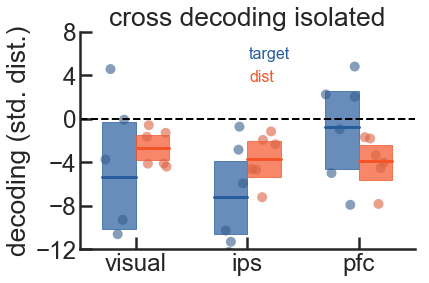

In [14]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[ (df_delay['condition']!='1_0.2')  & (df_delay['condition']!='2_0.2')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-12,8)
plt.gca().set_yticks([-12,-8,-4,0,4,8])
plt.title('cross decoding isolated')